**Price Prediction**
Author: Tinotenda H. Biningu


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

Backing off send_request(...) for 0.4s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55A9CB5B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
Backing off send_request(...) for 0.6s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55AFFBE20>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
Backing off send_request(...) for 1.8s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55AFFBE80>: Failed to establish a new connection: [E

## Data Description

In [2]:
#import dataframe and check the head
df = pd.read_csv("data.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#Summary of the categorical variables
df[["neighbourhood_group","room_type"]].describe()

,neighbourhood_group,room_type
count,48895,48895
unique,5,3
top,Manhattan,Entire home/apt
freq,21661,25409


In [5]:
#Summary of the non-catigorical columns
df.drop(["id","name","host_id","host_name","neighbourhood","room_type","longitude","latitude",'neighbourhood_group'],axis=1).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Summary Highlitghts**
1. The dataframe contains 48,895 entries
2. There are 5 categories in the neighbourhood groups and 3 types of rooms.
3. Most of the houses are located in Manhattan
4. Most room types are either entire rooms or appartments
5. The average price of houses/rooms is around 152 (currency) 
6. There may be some outliers in the price column

**Missing Values**

In [6]:
#Check missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- The "Last_Review" column is dropped since we cannot impute date-time objects
- Replace all missing reviews with 0 and treat them as no review
- Replace missing names and host names with "---" since we don't to lose their id's for predictions

In [7]:
#dropping the last_reviews column
df.drop(["last_review"],axis=1,inplace=True)

In [8]:
# Replace all missing reviews with 0
df['reviews_per_month'].fillna(0,inplace = True)
# Replace missing name and host_names with ---
df['name'].fillna("---",inplace=True)
df['host_name'].fillna("---",inplace=True)

In [9]:
#Check for missing values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Exploratory Data Analysis

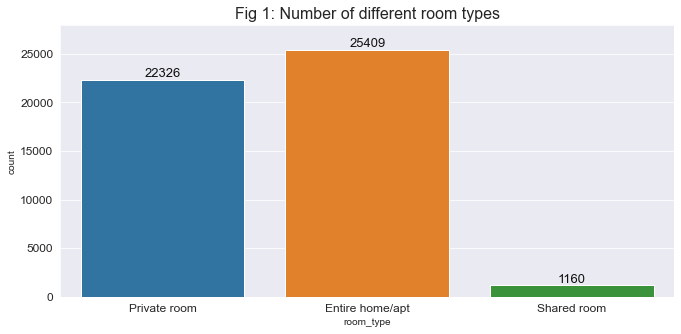

In [10]:
#Number of Different room_types
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(11, 5))
plt.title('Fig 1: Number of different room types', size = 16)
g = sns.countplot(x="room_type",data = df)
g.bar_label(ax.containers[0], label_type='edge',fmt='%g',fontsize=13, color = "#111") #labels
# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

**Summary**
- Most people are interested in purchasing Entire home/apt and Private Room types (Fig 1)

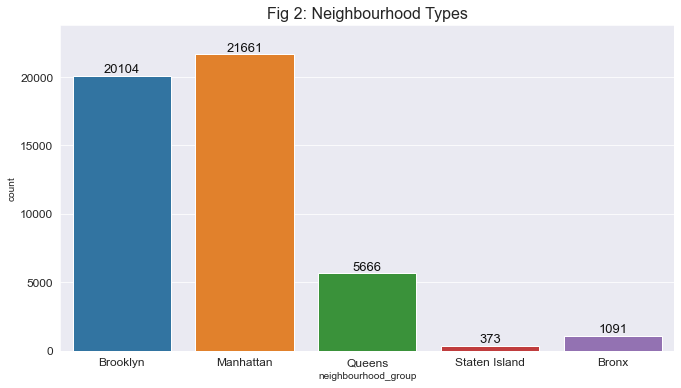

In [11]:
#Number of Different room_types
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(11, 6))
plt.title('Fig 2: Neighbourhood Types', size = 16)  #Plot Title
g = sns.countplot(x="neighbourhood_group",data = df)
g.bar_label(ax.containers[0], label_type='edge',fmt='%g',fontsize=13, color = "#111") #labels
# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

Backing off send_request(...) for 4.0s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55AFFB8B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


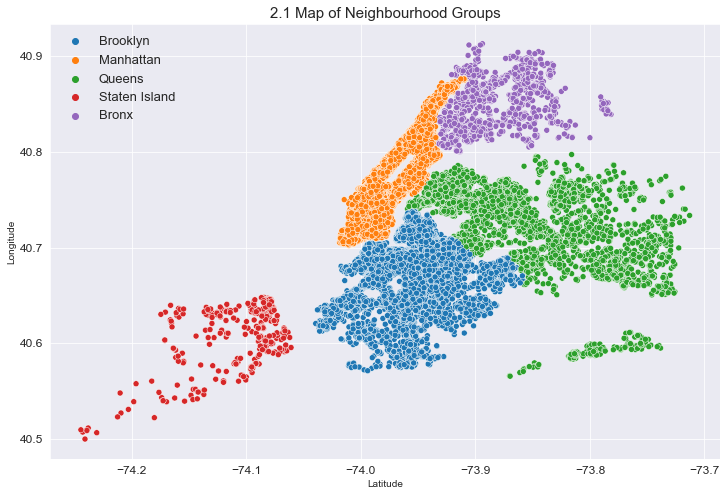

In [12]:
# Visualisation 6 - map of hosts

plt.figure(figsize=(12,8))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group',cmap="coolwarm")
plt.title('2.1 Map of Neighbourhood Groups', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

**Summary**

- Manhattan and Brookyln has the highest Neighbourhood Groups (Fig 2)
- Fig 2.1 shows the map of neighbourhood groups based on their coodinates

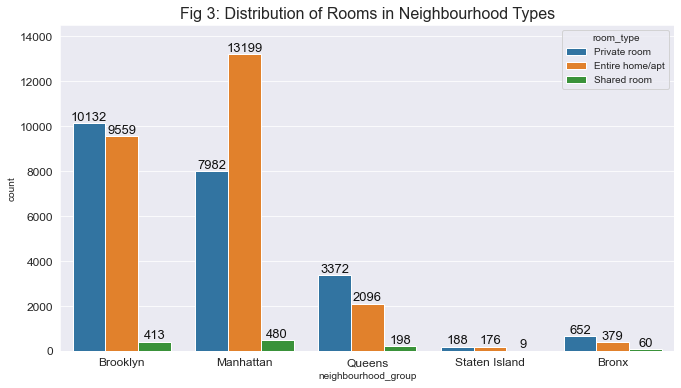

In [13]:
#Number of Different room_types
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(11, 6))
plt.title('Fig 3: Distribution of Rooms in Neighbourhood Types', size = 16)  #Plot Title
g = sns.countplot(x="neighbourhood_group",data = df,hue="room_type")
g.bar_label(ax.containers[0], label_type='edge',fmt='%g',fontsize=13, color = "#111")
g.bar_label(ax.containers[1], label_type='edge',fmt='%g',fontsize=13, color = "#111")
g.bar_label(ax.containers[2], label_type='edge',fmt='%g',fontsize=13, color = "#111")#labels
# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

**Summary**
1. Most people prefer Private Room than Entire home/apt type in Brooklyn

2. Most people prefer Entire home/apt than Private Room type in Manhatten

3. Even though Queens has relative low neighbourhood groups, customers prefare private rooms.

4. Accross the five neighbourhood groups fewer people prefer shared rooms


Text(0.5, 1.0, 'Fig 4: Relationship Between price and reviews_per_month')

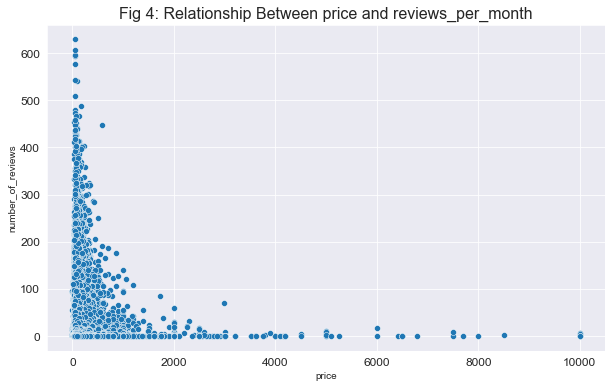

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="number_of_reviews",data=df)
plt.title('Fig 4: Relationship Between price and reviews_per_month', size = 16)

**Summary**

1. As price of rooms/houses gets expensive, those rooms/houses get poor reviews.

2. This may result in variety of factors

In [15]:
#Group neigbourhood_groups and calculating average price
a = df.groupby(by="neighbourhood_group").price.mean().reset_index()
a.head()

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


Text(0.5, 1.0, 'Fig 4: Average Price of houses in Neighbourhood Groups')

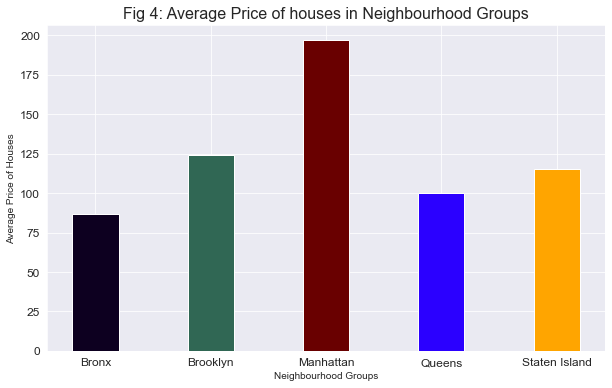

In [16]:
#Setting figure size
fig = plt.figure(figsize = (10, 6))
c = ['#0D0020', "#306754", '#690000', '#2B00FF', 'orange']
# creating the bar plot
plt.bar(a["neighbourhood_group"], round(a["price"]),width = 0.4, color = c)
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Average Price of Houses")
plt.title("Fig 4: Average Price of houses in Neighbourhood Groups",size = 16)

**Summary**

- The average price of houses/rooms in Manhattan is around  $197

In [17]:
#Grouping room_type and calculating average price
b = df.groupby(by="room_type").price.mean().reset_index()
b.head()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


Text(0.5, 1.0, 'Fig 5: Average Price of rooms')

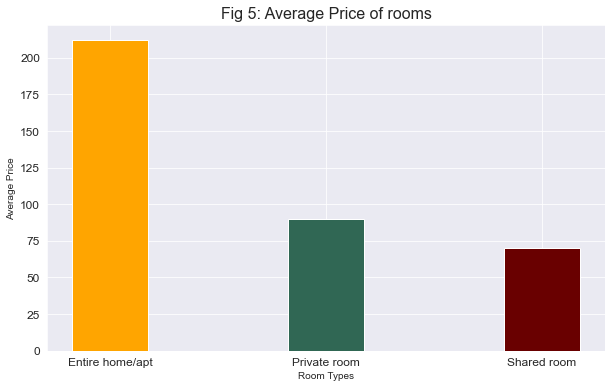

In [18]:
#Setting figure size
fig = plt.figure(figsize = (10, 6))
c = ['orange', "#306754", '#690000']
# creating the bar plot
plt.bar(b["room_type"], round(b["price"]),width = 0.35, color = c)
plt.xlabel("Room Types")
plt.ylabel("Average Price")
plt.title("Fig 5: Average Price of rooms",size = 16)



1. The average price of Entire/apt rooms is around 211 dollars

2. The average private rooms is around 89 dollars

3. The average price of shared rooms is around 70 dollars

In [19]:
c = df.groupby(by="room_type").reviews_per_month.mean().reset_index()
c.head()

,room_type,reviews_per_month
0,Entire home/apt,1.045509
1,Private room,1.143493
2,Shared room,1.073345


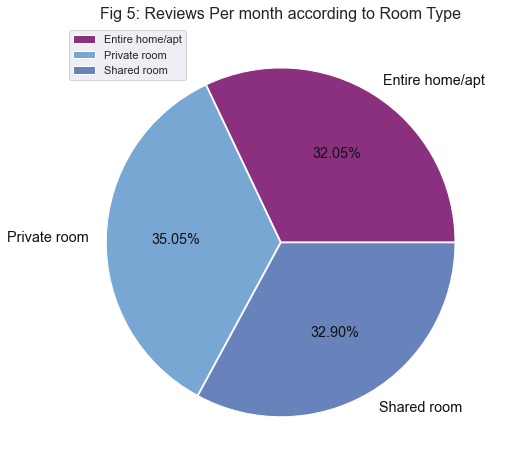

In [20]:
#Create a list that contains the number of exited customer 
Reviews = [c["reviews_per_month"][0],c["reviews_per_month"][1],c["reviews_per_month"][2]]

#set figure size and title
plt.subplots(figsize=(8, 8))
plt.title('Fig 5: Reviews Per month according to Room Type', size = 16)

#display the proportion of Customer Churn
plt.pie(Reviews,labels = ['Entire home/apt', 'Private room',"Shared room"], autopct='%.2f%%',
        explode = (0.003 ,0.003,0.003),textprops={'color':"#111",'size': "x-large"}, colors = ['#8A307F','#79A7D3',"#6883BC"])
plt.legend(labels = ['Entire home/apt', 'Private room',"Shared room"], loc = "best",prop={'size': 11})
plt.show()

**Highlight**
1. Even though Entire/apt rooms are prefarred rooms by customers, they have a relatively low reviews per month

### Outliers

From the plot, we can see there are alot of outliers in the price column, let try and fix that. First let plot the distribution of the price colmn to know which type of outlier manipulation to use.

<AxesSubplot:>

Backing off send_request(...) for 6.4s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55E222A00>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


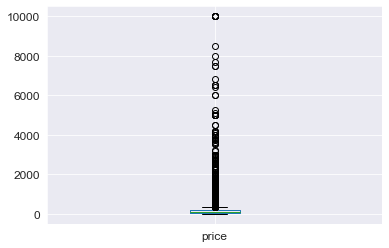

In [21]:
df.boxplot(column="price") #boxplot to detect outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

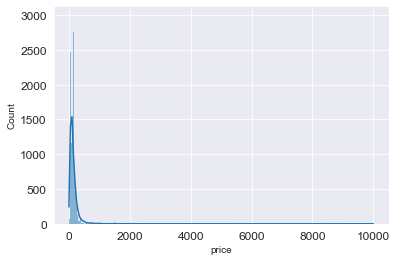

In [22]:
sns.histplot(df["price"],kde=True)

From the distribution of the target variable, we will use the IQR method since it is right skewed and delete extreme bounderies.

In [23]:
#Calculate the upper and lower bounderies of Price
quartile_1, quartile_3 = np.percentile(df.price, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5) #lower boundery
upper_bound = quartile_3 + (iqr * 1.5) # upper boundery

In [24]:
# Delete the outliers
df = df[df.price<upper_bound]
df = df[df.price>lower_bound]

In [25]:
df.shape

(45918, 15)

<AxesSubplot:xlabel='price', ylabel='Count'>

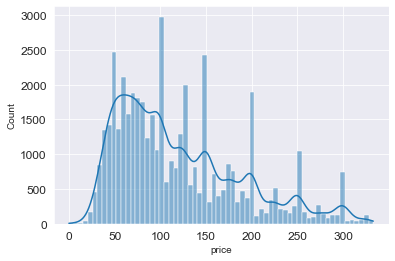

In [26]:
# Now it seems a bit ok
sns.histplot(df["price"],kde=True)

#  Feature Selection and Engineering

<AxesSubplot:>

Backing off send_request(...) for 19.4s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55E222A30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


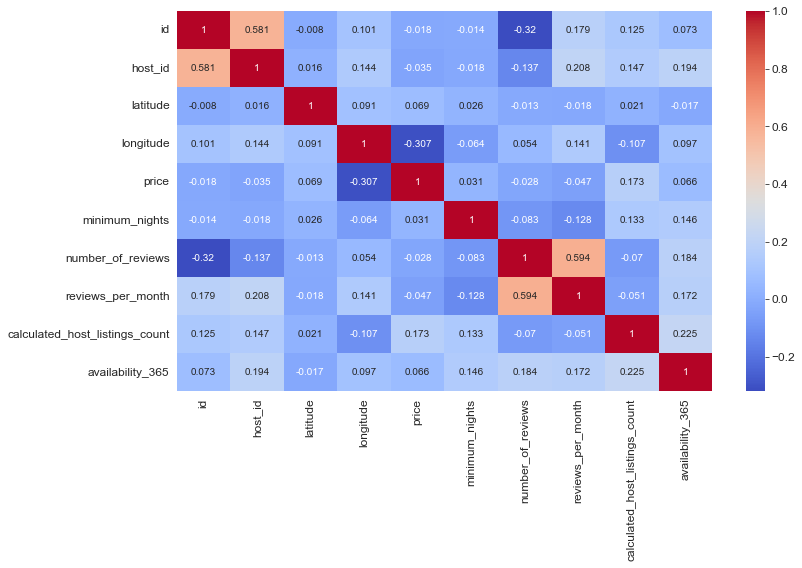

In [27]:
# Plotting the correlation matrix
plt.figure(figsize = (12,7))
sns.heatmap(round(df.corr(),3),annot=True, fmt="g",cmap="coolwarm")

- The correlation between price(target) and the other independent variable are very weak
- There are no importance between  the latitude, longitude and price so we drop those two features

## Feature Engineering

In [28]:
#drop unwanted columns
df.drop(["host_id","name","host_name","longitude","latitude","neighbourhood","id"],axis=1,inplace=True)

In [29]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Private room,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,80,10,9,0.10,1,0


**One Hot-Encoding**

In [30]:
#Treating Categorical Variables as Dummies
df1 = pd.get_dummies(df,columns = ["neighbourhood_group","room_type"],drop_first=True)

In [31]:
df1

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.00,1,365,0,1,0,0,1,0
3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,0.00,2,9,1,0,0,0,1,0
48891,40,4,0,0.00,2,36,1,0,0,0,1,0
48892,115,10,0,0.00,1,27,0,1,0,0,0,0
48893,55,1,0,0.00,6,2,0,1,0,0,0,1


### Model Training Linear Regression

In [32]:
# Declaring the target variable(Y) and the independent variables(X) for training
X = df1.drop(["price"],axis = 1)
y = df1["price"]

In [33]:
#Spitting data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #30/70 split ratio

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
#Initialise the regression model
lm = LinearRegression()
# fit the model
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
#print coeffecients of the regression model
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
minimum_nights,-0.199471
number_of_reviews,-0.045886
reviews_per_month,-0.600091
calculated_host_listings_count,0.130478
availability_365,0.051911


### Model Evaluation

In [36]:
#import the evaluation metrics
from sklearn import metrics
# Make predictions
predictions = lm.predict(X_test)


In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 Score:", metrics.r2_score(y_test, predictions))

MAE: 37.61559017818072
MSE: 2571.656150380769
RMSE: 50.71149919279422
R2 Score: 0.4506204154376847


Text(0, 0.5, 'Actual')

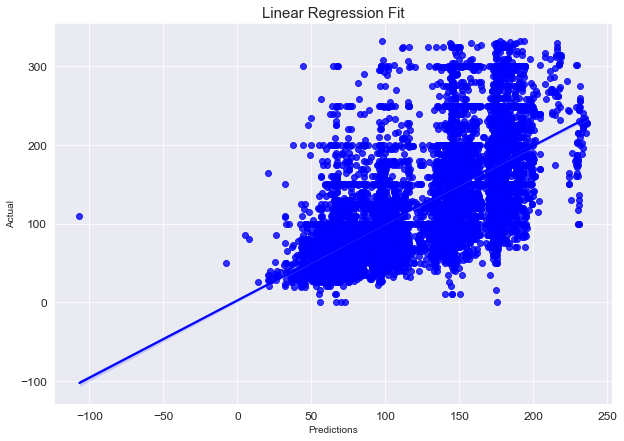

In [60]:
#Plot of the line of best fit
plt.figure(figsize=(10,7))
sns.regplot(y=y_test, x=predictions, color='blue')
plt.title('Linear Regression Fit', fontsize=15)
plt.xlabel('Predictions',fontsize=10)
plt.ylabel('Actual', fontsize = 10)

Text(0.5, 1.0, 'Residuals')

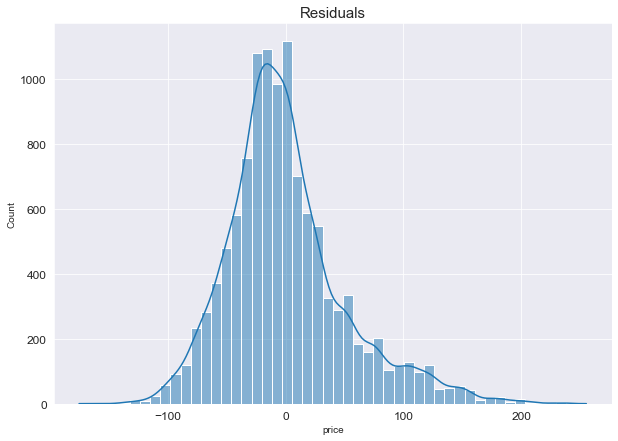

In [64]:
#Plot the residuals
plt.figure(figsize=(10,7))
sns.histplot((y_test-predictions),bins=50,kde=True)
plt.title('Residuals', fontsize=15)

### Training XGBOOST Model

In [38]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels.
cat_vars =["neighbourhood_group","room_type"]
df[cat_vars] = df[cat_vars].apply(LabelEncoder().fit_transform)
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,149,1,9,0.21,6,365
1,2,0,225,1,45,0.38,2,355
2,2,1,150,3,0,0.00,1,365
3,1,0,89,1,270,4.64,1,194
4,2,0,80,10,9,0.10,1,0


In [39]:
X1 = df.drop(["price"],axis = 1)
y1 = df["price"]

In [40]:
#Spitting data into training set and testing set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42) #30/70 split ratio

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
reg = GradientBoostingRegressor(learning_rate=0.7,n_estimators=50)
reg.fit(X1_train, y1_train)

GradientBoostingRegressor(learning_rate=0.7, n_estimators=50)

In [55]:
predict3 = reg.predict(X1_test)
print('MAE:', metrics.mean_absolute_error(y1_test, predict3))
print('MSE:', metrics.mean_squared_error(y1_test, predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predict3)))
print("R2 Score:", metrics.r2_score(y1_test, predict3)) 

MAE: 35.72712920245982
MSE: 2362.0026727464992
RMSE: 48.60043901804282
R2 Score: 0.4954084172969947


Text(0, 0.5, 'Actual')

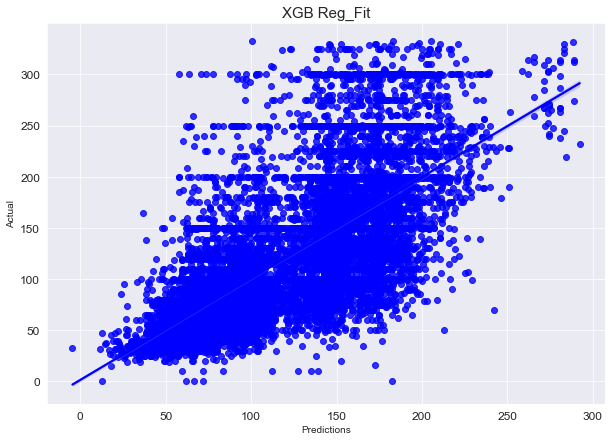

In [59]:
#Plot of the line of best fit
plt.figure(figsize=(10,7))
sns.regplot(y=y1_test, x=predict3, color='blue')
plt.title('XGB Reg_Fit', fontsize=15)
plt.xlabel('Predictions',fontsize=10)
plt.ylabel('Actual', fontsize = 10)

Text(0.5, 1.0, 'Residuals')

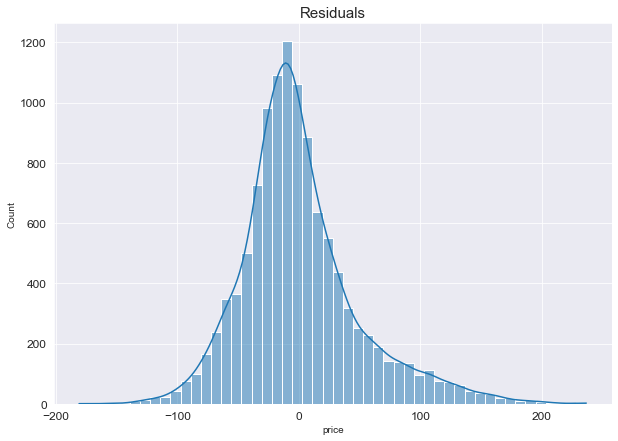

In [63]:
#Plot the residuals
plt.figure(figsize=(10,7))
sns.histplot((y1_test-predict4),bins=50,kde=True)
plt.title('Residuals', fontsize=15)

### Training Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(n_estimators=50,ccp_alpha=1,oob_score=True)
rf.fit(X1_train, y1_train)

Backing off send_request(...) for 10.1s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55E222940>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
Backing off send_request(...) for 13.2s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55E222A60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
Backing off send_request(...) for 60.5s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C55E2229A0>: Failed to establish a new connection:

RandomForestRegressor(ccp_alpha=1, n_estimators=50, oob_score=True)

In [57]:
predict4 = rf.predict(X1_test)
print('MAE:', metrics.mean_absolute_error(y1_test, predict4))
print('MSE:', metrics.mean_squared_error(y1_test, predict4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predict4)))
print("R2 Score:", metrics.r2_score(y1_test, predict4)) 

MAE: 35.56270833847783
MSE: 2360.435388862972
RMSE: 48.58431216826036
R2 Score: 0.4957432341303788


Text(0, 0.5, 'Actual')

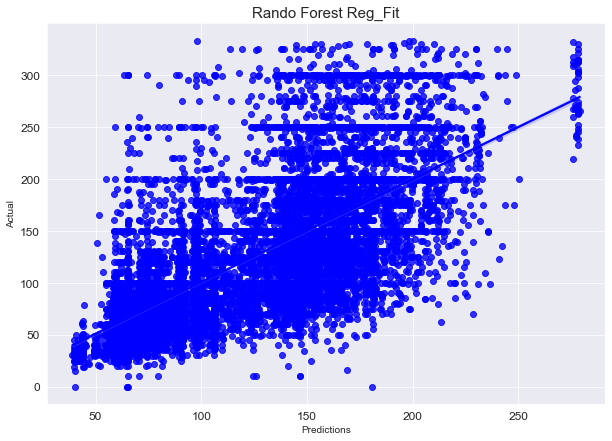

In [61]:
#Plot of the line of best fit
plt.figure(figsize=(10,7))
sns.regplot(y=y1_test, x=predict4, color='blue')
plt.title('Rando Forest Reg_Fit', fontsize=15)
plt.xlabel('Predictions',fontsize=10)
plt.ylabel('Actual', fontsize = 10)

Text(0.5, 1.0, 'Residuals')

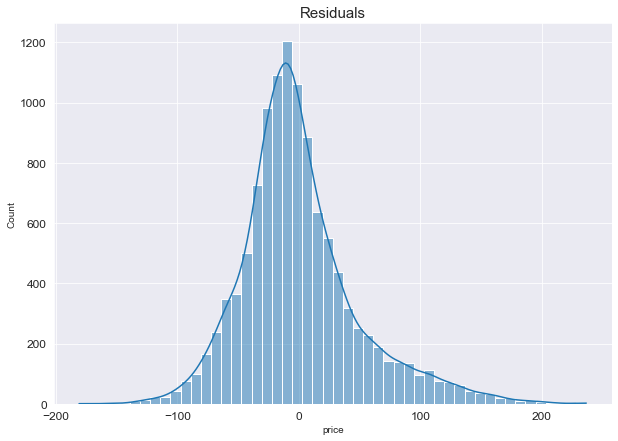

In [62]:
#Plot the residuals
plt.figure(figsize=(10,7))
sns.histplot((y1_test-predict4),bins=50,kde=True)
plt.title('Residuals', fontsize=15)

**Discussions**

- From the Linear Regression model, 45% of the variations in price (y) is explained by the independent variables. 
- However, Random Forest and Gradient Boosting had an $r^2$ of ~50%
- The performance of the model is sorely based on the low correlations between the independent variable and the target variable.
- From the residual plot, we can see the difference between actual and the predicted y's is normally distributed. 
- The performances of the models can be improved by training the model with neural networks